In [1]:
%pylab inline
import galsim
import numpy as np
import astropy.io.fits as pyfits

Populating the interactive namespace from numpy and matplotlib


In [2]:
# training data download from
# https://zenodo.org/record/3242143/files/COSMOS_25.2_training_sample.tar.gz
catName     =   'real_galaxy_catalog_25.2.fits'
directory   =   os.path.join(os.environ['homeWrk'],'COSMOS/galsim_train/COSMOS_25.2_training_sample/')

cosmos_cat  =   galsim.COSMOSCatalog(catName, dir=directory)
# index
index_use   =   cosmos_cat.orig_index
# parametric catalog
param_cat   =   cosmos_cat.param_cat[index_use]
print('We have %d galaxies with image, COSMOS photoz (30 bands) and parametric (sersic/bulge+disk) fitting.'% len(param_cat))
# real catalog
rgc = galsim.RealGalaxyCatalog(catName,dir=directory)

We have 81499 galaxies with image, COSMOS photoz (30 bands) and parametric (sersic/bulge+disk) fitting.


The redshift of this galaxy is: 1.494
The index in the real catalog is: 207


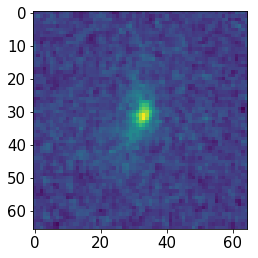

In [12]:
# index in the parameter catalog
index=201
print('The redshift of this galaxy is: %.3f' %param_cat[index]['zphot'])
# get the corresponding index in the real catalog 
indexR=rgc.getIndexForID(param_cat['IDENT'][index])
print('The index in the real catalog is: %d' %indexR)
# get the image
galImg=rgc.getGalImage(indexR)
plt.imshow(galImg.array)

87798


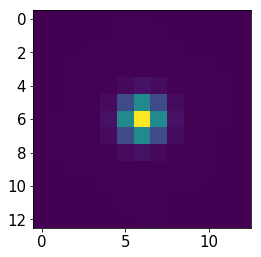

In [14]:
# noise correlation
corNoi=rgc.getNoise(indexR)
print(len(rgc.pixel_scale))
img =   galsim.ImageF(13,13,scale=rgc.pixel_scale[index])
corNoi.drawImage(img)
plt.imshow(img.array)

galsim.PositionI(x=26, y=33)

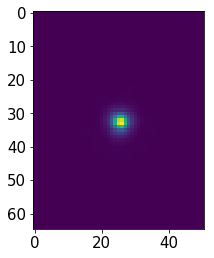

In [23]:
#PSF
psfImg=rgc.getPSFImage(indexR)
plt.imshow(psfImg.array)

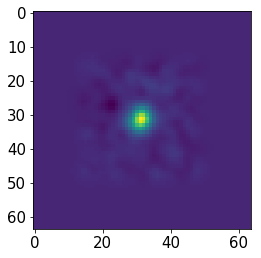

In [16]:
# some example for image manipulation
## preparation
bigfft      =   galsim.GSParams(maximum_fft_size=10240)
psfInt=galsim.Moffat(beta=3.5,fwhm=0.615,trunc=0.615*4.)
psfInt=psfInt.shear(e1=0.,e2=0.02)

ngrid       =   64
scale       =   0.168
img =   galsim.ImageF(ngrid,ngrid,scale=scale)
img.setOrigin(0,0)
gal=cosmos_cat.makeGalaxy(gal_type='real',index=index,gsparams=bigfft)
# better to make galaxy like this for image manipulation
gal=galsim.Convolve([gal,psfInt])# e.g., smearing
plt.imshow(gal.drawImage(img,method='no_pixel').array)